# Exploring information in paired chains

In [1]:
import pandas as pd
import numpy as np

#Pyrepseq imports
import pyrepseq as prs
import pyrepseq.plotting as rsp
import pyrepseq.distance as rsd
import pyrepseq.stats as rss

#Plotting imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style 
import matplotlib as mpl 
import seaborn as sns



from matplotlib.colors import LogNorm, Normalize
from tcrpc.tcrpc_src import pc_grouped

In [2]:
#Set default plotting parameters
mpl.rcParams['figure.figsize'] = [4.0, 4.0] 
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=500 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20


plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Data imports

### VDJdb -specific 

In [3]:
vdjdb = pd.read_csv('../data/vdjdb/vdjdb_paired_human_preprocessed.csv',sep=',')

vdjdb = vdjdb.dropna(axis=0, subset = ["CDR3B", "TRBV", "TRBJ",
                                      "CDR3A", "TRAV", "TRAJ"] ).reset_index().drop("index", axis=1)

### Tanno -background

In [4]:
tanno = pd.read_csv('../data/tanno/preprocessed/combined.csv',sep=',')
tanno = tanno.dropna(axis=0, subset = ["CDR3B", "TRBV", "TRBJ",
                                      "CDR3A", "TRAV", "TRAJ"] ).reset_index().drop("index", axis=1)

## Alpha and Beta CDR3 relevance

In [5]:
#Individual relevance 
h_cdr3a_back = -np.log2(rss.pc(tanno['CDR3A']))
h_cdr3b_back = -np.log2(rss.pc(tanno['CDR3B']))

h_cdr3a_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3A"]))
h_cdr3b_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3B"]))

#Joint relevance
h_cdr3aandcdr3b_back = -np.log2(rss.pc(tanno['CDR3A'])*rss.pc(tanno['CDR3B']))
h_cdr3aandcdr3b_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3A","CDR3B"]))

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))


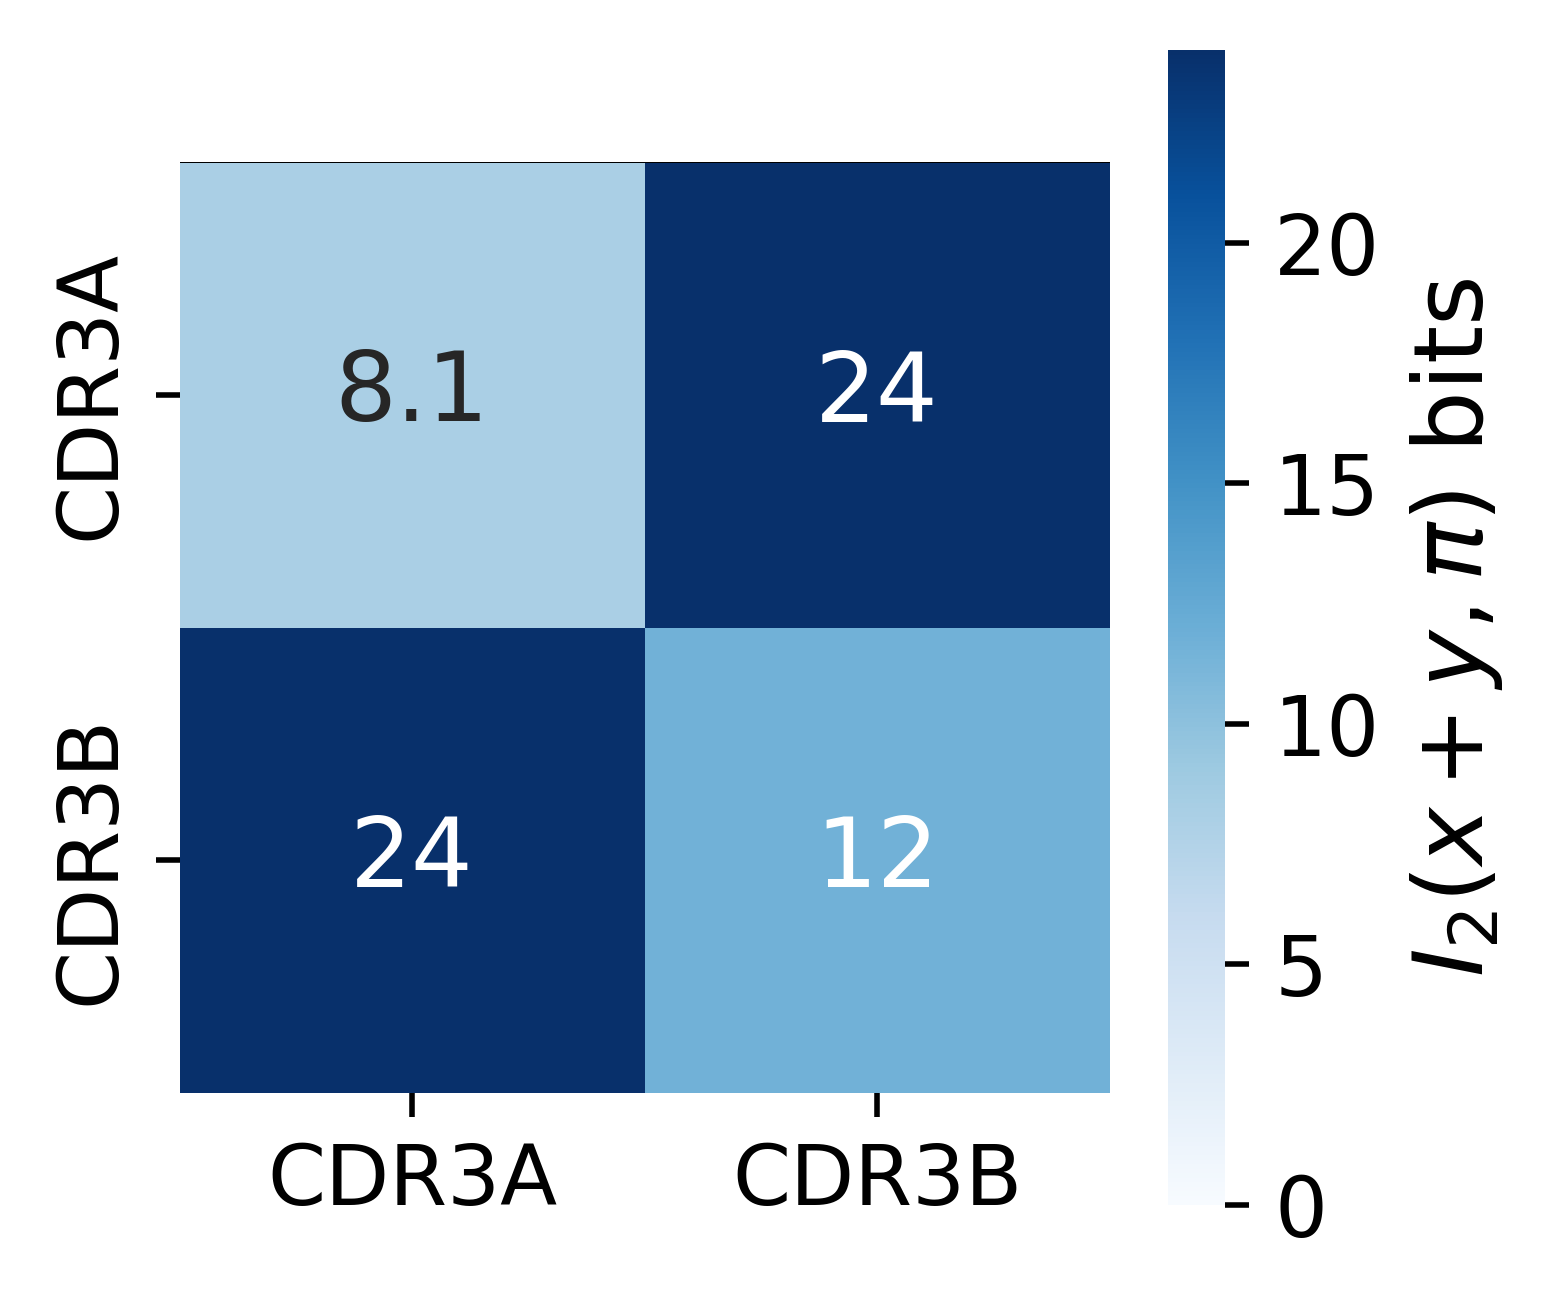

In [6]:
array = [
    [h_cdr3a_back-h_cdr3a_spc, h_cdr3aandcdr3b_back-h_cdr3aandcdr3b_spc],
    [h_cdr3aandcdr3b_back-h_cdr3aandcdr3b_spc,h_cdr3b_back-h_cdr3b_spc]
]

df_mi = pd.DataFrame(array, index=["CDR3A", "CDR3B"], columns=["CDR3A", "CDR3B"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x+y, \pi)$ bits'},vmin=0,annot=True,vmax=24)
ax.set_facecolor('xkcd:black')
plt.savefig('alphabetaRelevance.png');

## Alpha and beta CDR3 synergy

In [7]:
syn_alphabeta = (h_cdr3aandcdr3b_back-h_cdr3aandcdr3b_spc) - (h_cdr3a_back-h_cdr3a_spc) - (h_cdr3b_back-h_cdr3b_spc)
print(syn_alphabeta)

4.683287116650174


## Alpha and beta CDR3  redundancy

In [8]:
h_cdr3agivencdr3b_back = h_cdr3a_back
h_cdr3bgivencdr3a_back = h_cdr3b_back

h_cdr3agivencdr3b_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","CDR3B"], ["CDR3A"]))
h_cdr3bgivencdr3a_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","CDR3A"], ["CDR3B"]))

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))


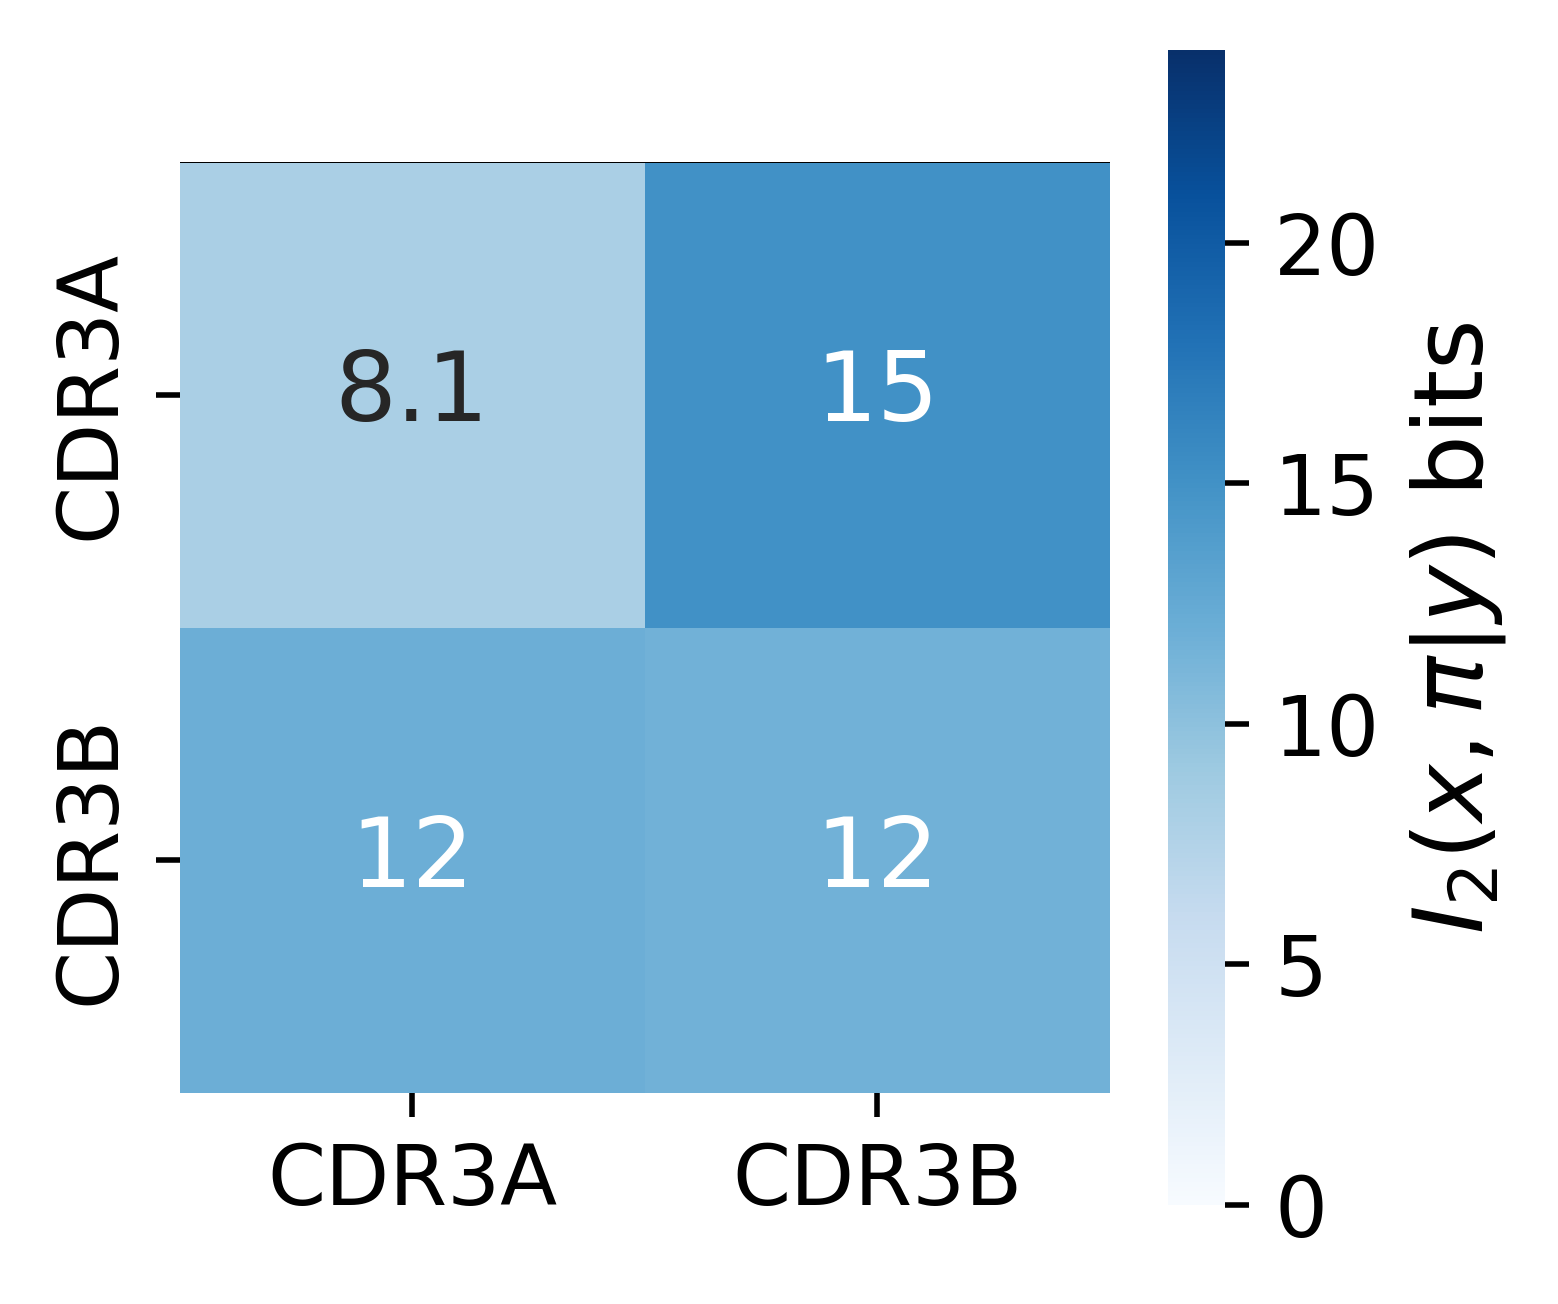

In [9]:
array = [
    [h_cdr3a_back-h_cdr3a_spc, h_cdr3bgivencdr3a_back-h_cdr3bgivencdr3a_spc],
    [h_cdr3agivencdr3b_back-h_cdr3agivencdr3b_spc,h_cdr3b_back-h_cdr3b_spc]
]

df_mi = pd.DataFrame(array, index=["CDR3A", "CDR3B"], columns=["CDR3A", "CDR3B"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x, \pi | y)$ bits'},annot=True,vmin=0,vmax=24)
ax.set_facecolor('xkcd:black')
plt.savefig('alphabetaRedundancy.png');

## Full CDR3A+CDR3B+BV+BJ region joint information and synergy

In [10]:
#Individual relevance - background
h_av_back = -np.log2(rss.pc(tanno['TRAV']))
h_cdr3a_back = -np.log2(rss.pc(tanno['CDR3A']))
h_bv_back = -np.log2(rss.pc(tanno['TRBV']))
h_cdr3b_back = -np.log2(rss.pc(tanno['CDR3B']))

#Individual relevance - specifc
h_av_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRAV"]))
h_cdr3a_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3A"]))
h_bv_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBV"]))
h_cdr3b_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3B"]))

#Joint relevance - background
h_avcdr3a_back = -np.log2(rss.pc(tanno['CDR3A']+tanno['TRAV']))
h_bvcdr3b_back = -np.log2(rss.pc(tanno['CDR3B']+tanno['TRBV']))
h_cdr3acdr3b_back = -np.log2(rss.pc(tanno['CDR3A'])*rss.pc(tanno['CDR3B']))
h_avbv_back = -np.log2(rss.pc(tanno['TRAV'])*rss.pc(tanno['TRBV']))

h_all_back = -np.log2(rss.pc(tanno['CDR3A']+tanno['TRAV'])*rss.pc(tanno['CDR3B']+tanno['TRBV']))

#Joint relevance - specifc
h_avcdr3a_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRAV","CDR3A"]))
h_bvcdr3b_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRBV","CDR3B"]))
h_cdr3acdr3b_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["CDR3A","CDR3B"]))
h_avbv_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRAV","TRBV"]))

h_all_spc = -np.log2(pc_grouped(vdjdb, "Epitope", ["TRAV","TRBV","CDR3A","CDR3B"]))

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encou

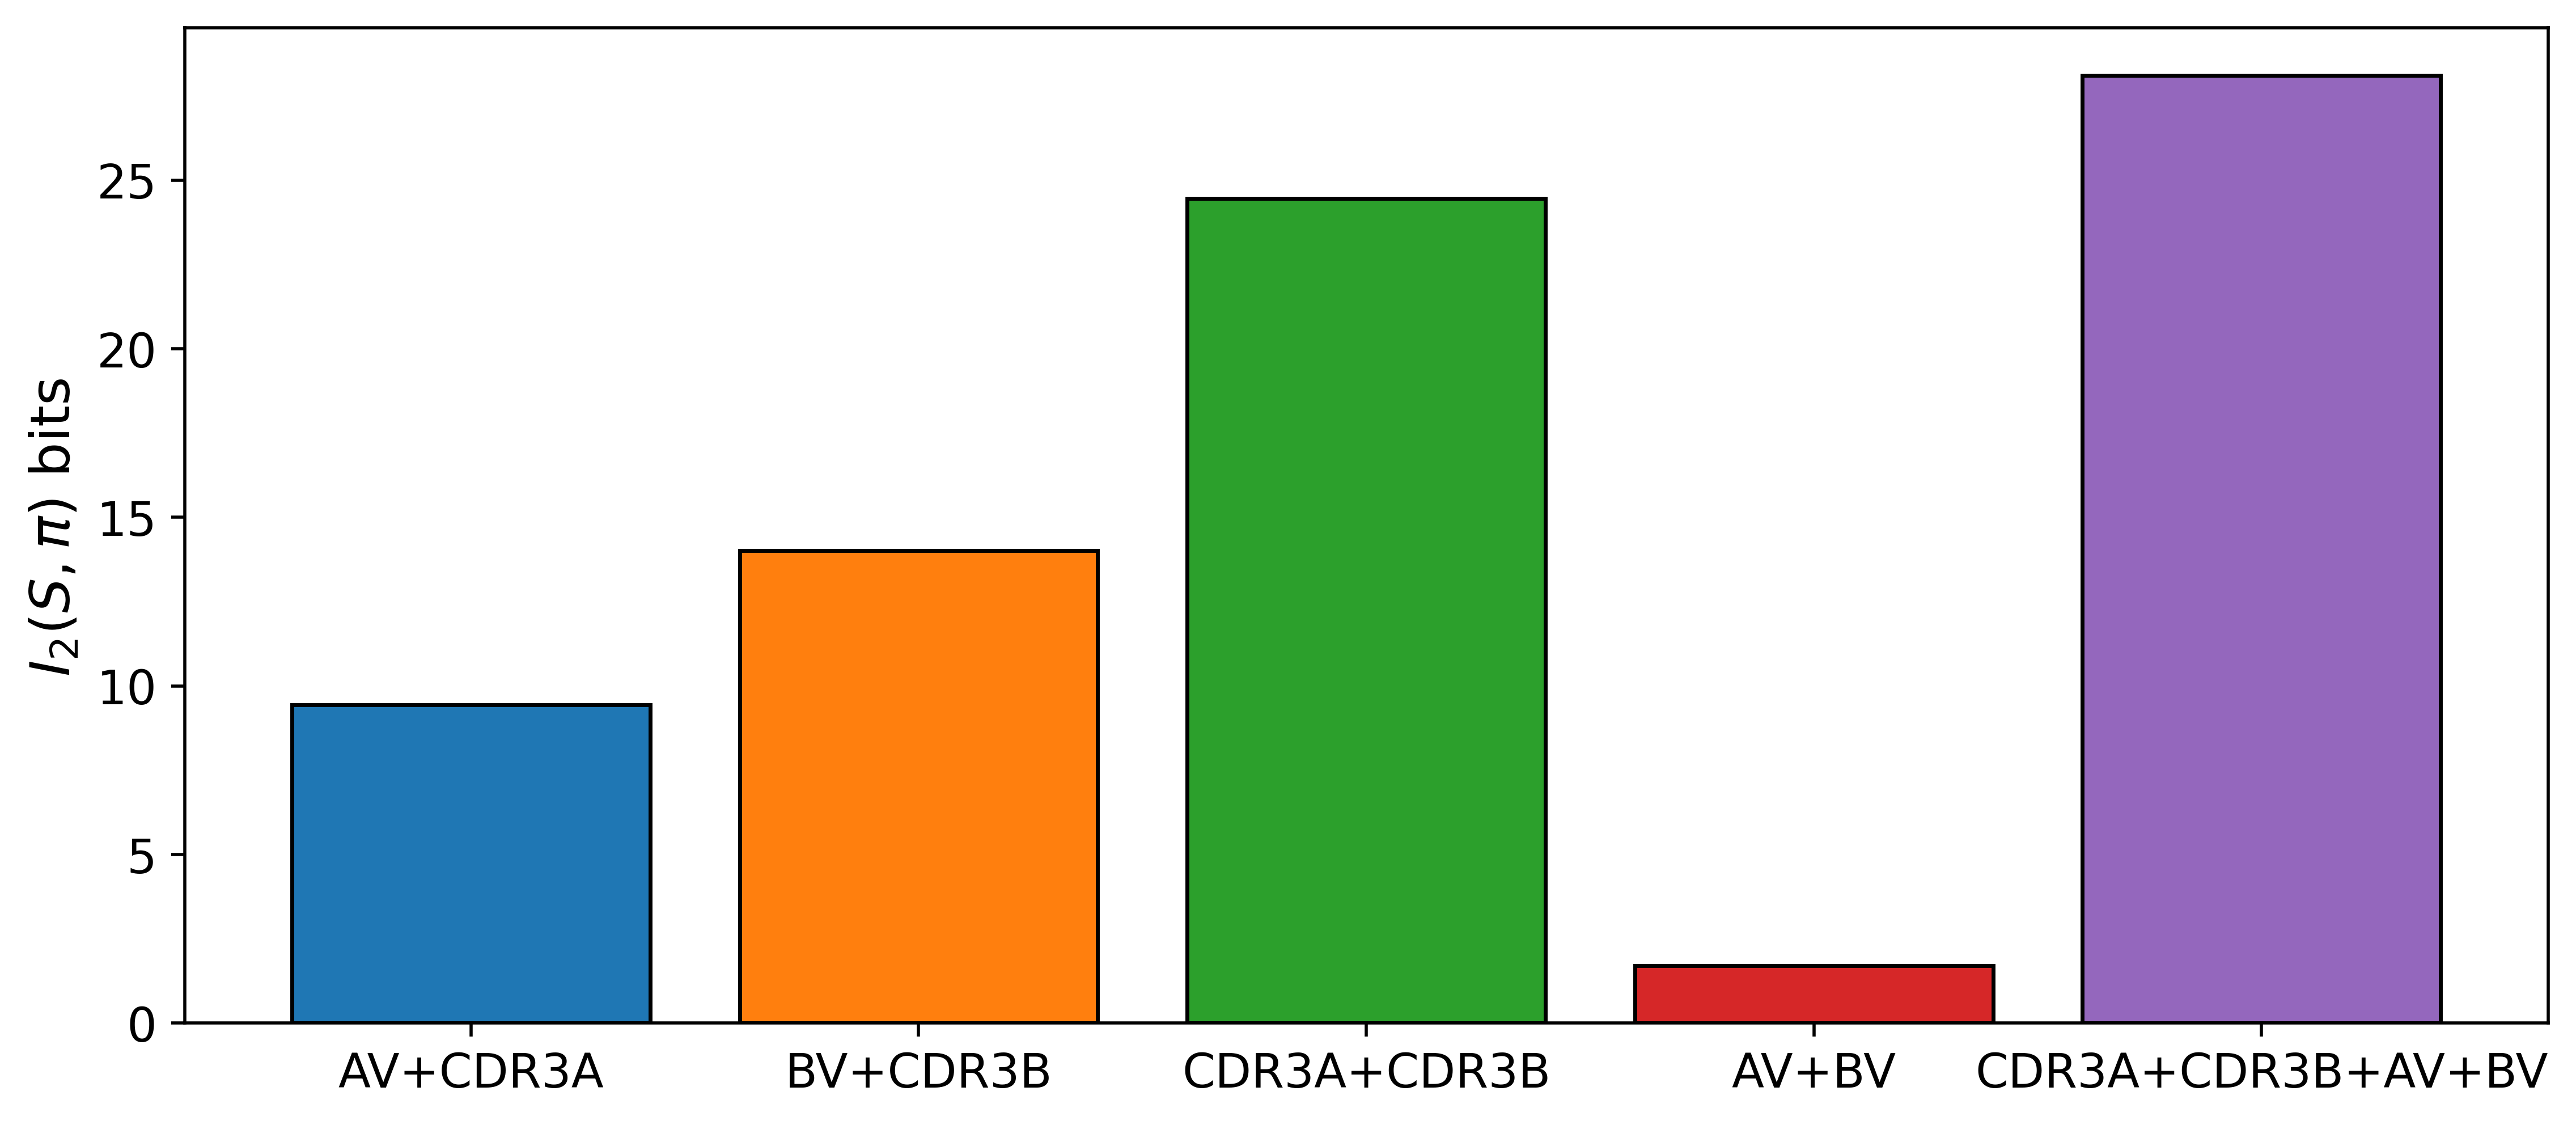

In [11]:
fig,ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=3.0)

bars = ("AV+CDR3A","BV+CDR3B","CDR3A+CDR3B","AV+BV","CDR3A+CDR3B+AV+BV")
ypos = np.arange(len(bars))

ax.bar(1,h_avcdr3a_back-h_avcdr3a_spc, edgecolor='black')
ax.bar(2,h_bvcdr3b_back-h_bvcdr3b_spc, edgecolor='black')
ax.bar(3,h_cdr3acdr3b_back-h_cdr3acdr3b_spc, edgecolor='black')
ax.bar(4,h_avbv_back-h_avbv_spc, edgecolor='black')
ax.bar(5,h_all_back-h_all_spc, edgecolor='black')

ax.set_ylabel(r'$I_2(S,\pi)$ bits ')
ax.set_xticks([1,2,3,4,5],bars)
plt.savefig('fullRelevance.png');

In [12]:
syn_avcdr3a = (h_avcdr3a_back-h_avcdr3a_spc) - (h_cdr3a_back-h_cdr3a_spc) - (h_av_back-h_av_spc)
syn_bvcdr3b = (h_bvcdr3b_back-h_bvcdr3b_spc) - (h_cdr3b_back-h_cdr3b_spc) - (h_bv_back-h_bv_spc)
syn_cdr3acdr3b = (h_cdr3acdr3b_back-h_cdr3acdr3b_spc) - (h_cdr3a_back-h_cdr3a_spc) - (h_cdr3b_back-h_cdr3b_spc)
syn_avbv = (h_avbv_back-h_avbv_spc) - (h_av_back-h_av_spc) - (h_bv_back-h_bv_spc)
syn_all = (h_all_back - h_all_spc) - (h_cdr3a_back-h_cdr3a_spc) - (h_av_back-h_av_spc) - (h_cdr3b_back-h_cdr3b_spc) - (h_bv_back-h_bv_spc)

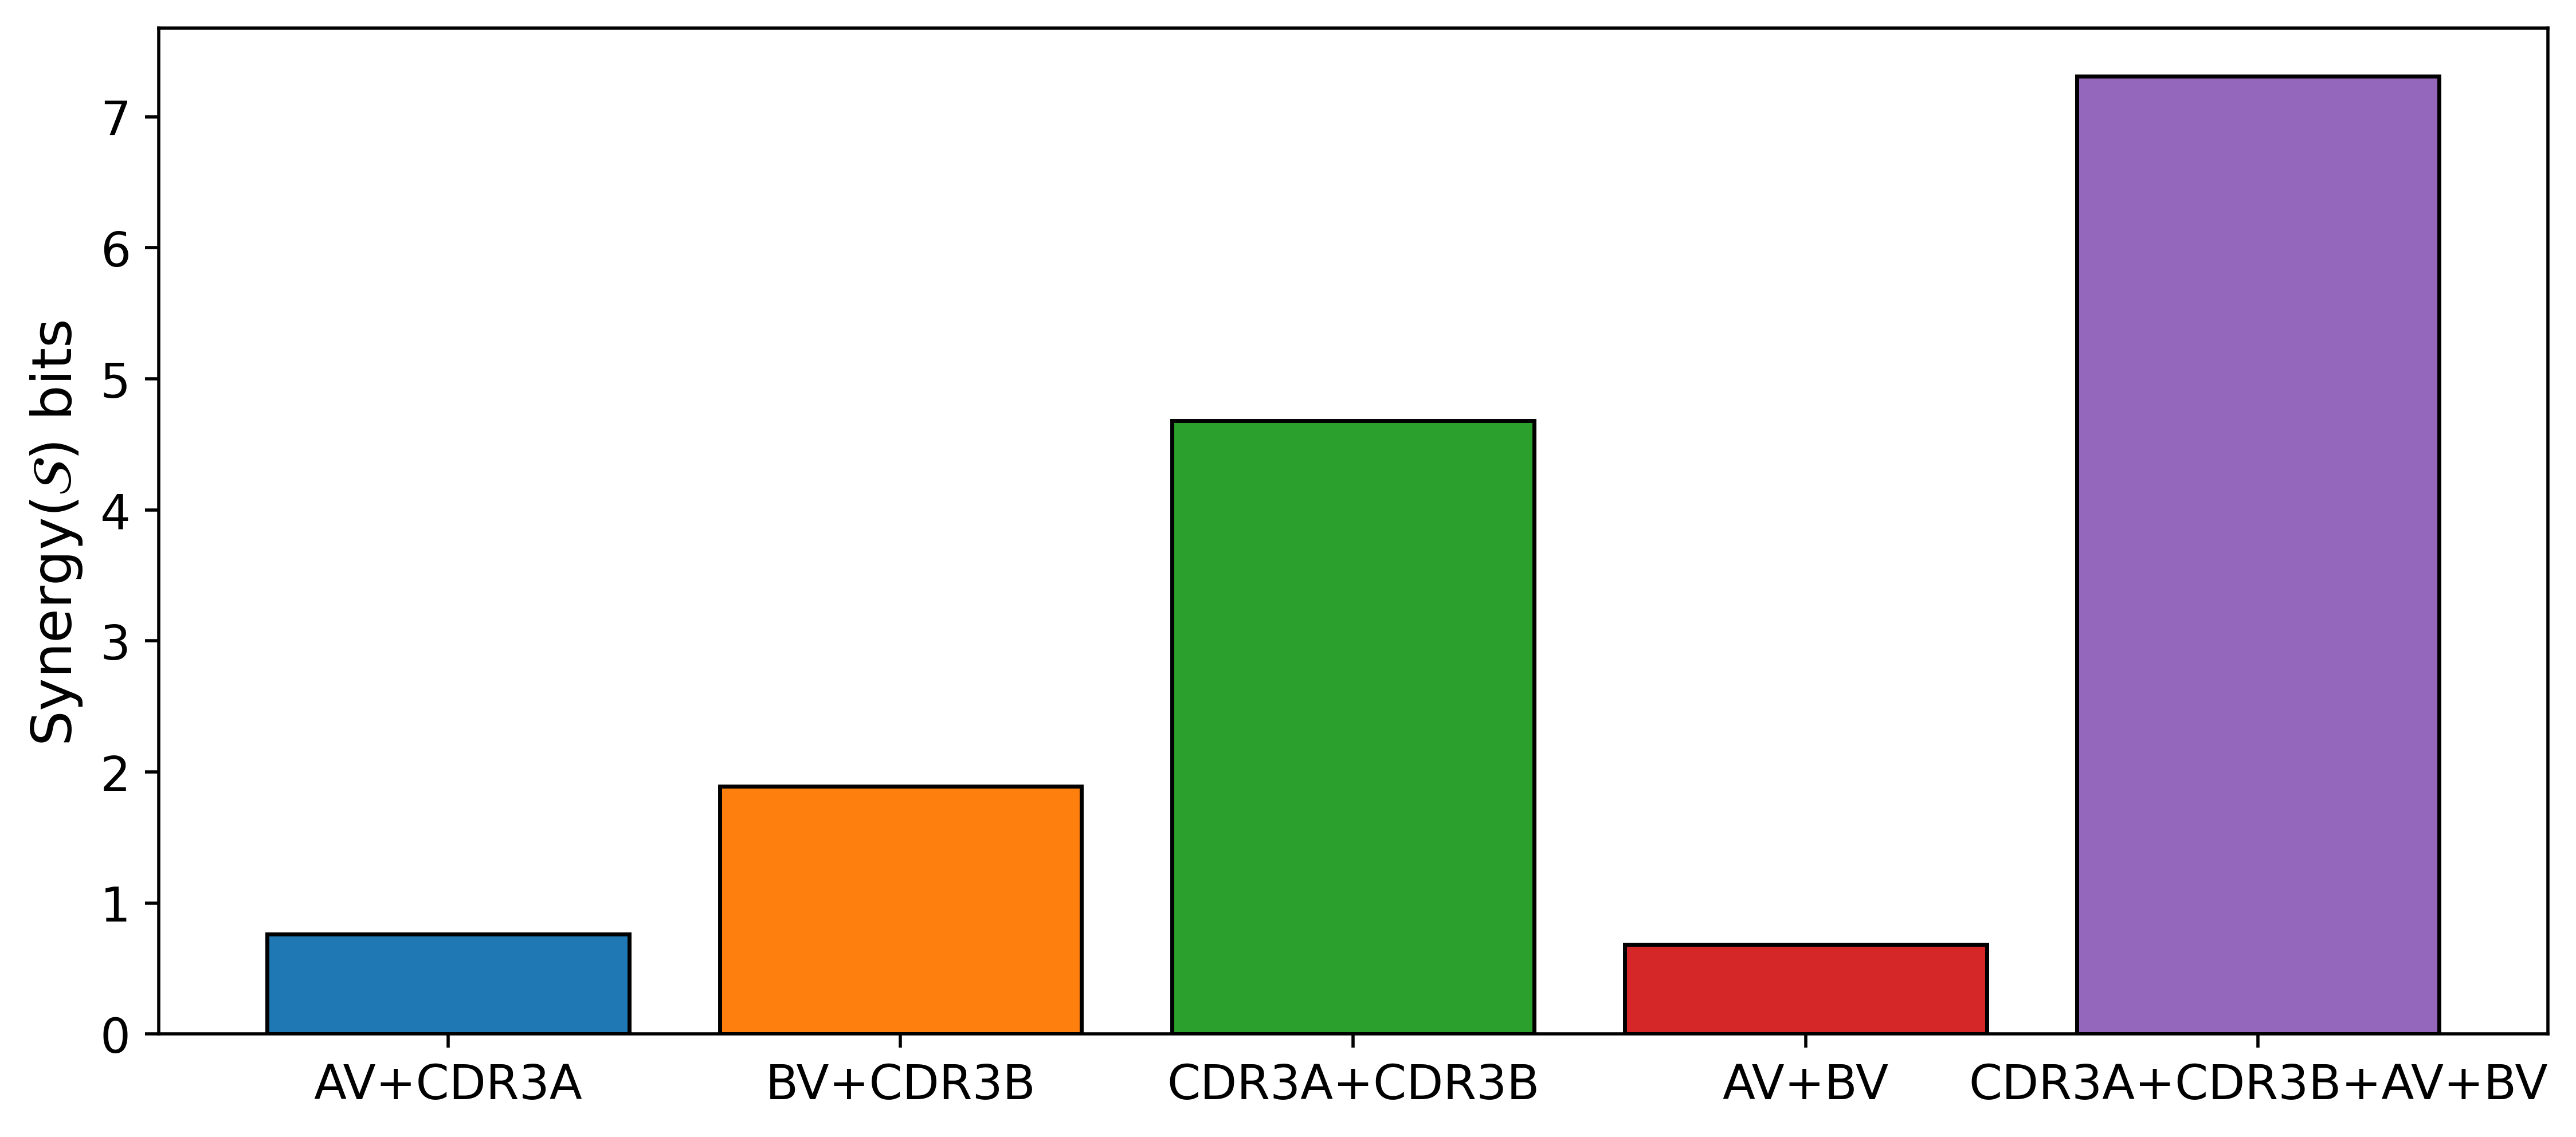

In [13]:
fig,ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=3.0)

bars = ("AV+CDR3A","BV+CDR3B","CDR3A+CDR3B","AV+BV","CDR3A+CDR3B+AV+BV")
ypos = np.arange(len(bars))

ax.bar(1,syn_avcdr3a, edgecolor='black')
ax.bar(2,syn_bvcdr3b, edgecolor='black')
ax.bar(3,syn_cdr3acdr3b, edgecolor='black')
ax.bar(4,syn_avbv, edgecolor='black')
ax.bar(5,syn_all, edgecolor='black')

ax.set_ylabel(r'Synergy($\mathcal{S}$) bits ')
ax.set_xticks([1,2,3,4,5],bars)
plt.savefig('fullSynergy.png');

## V gene across chain relevance

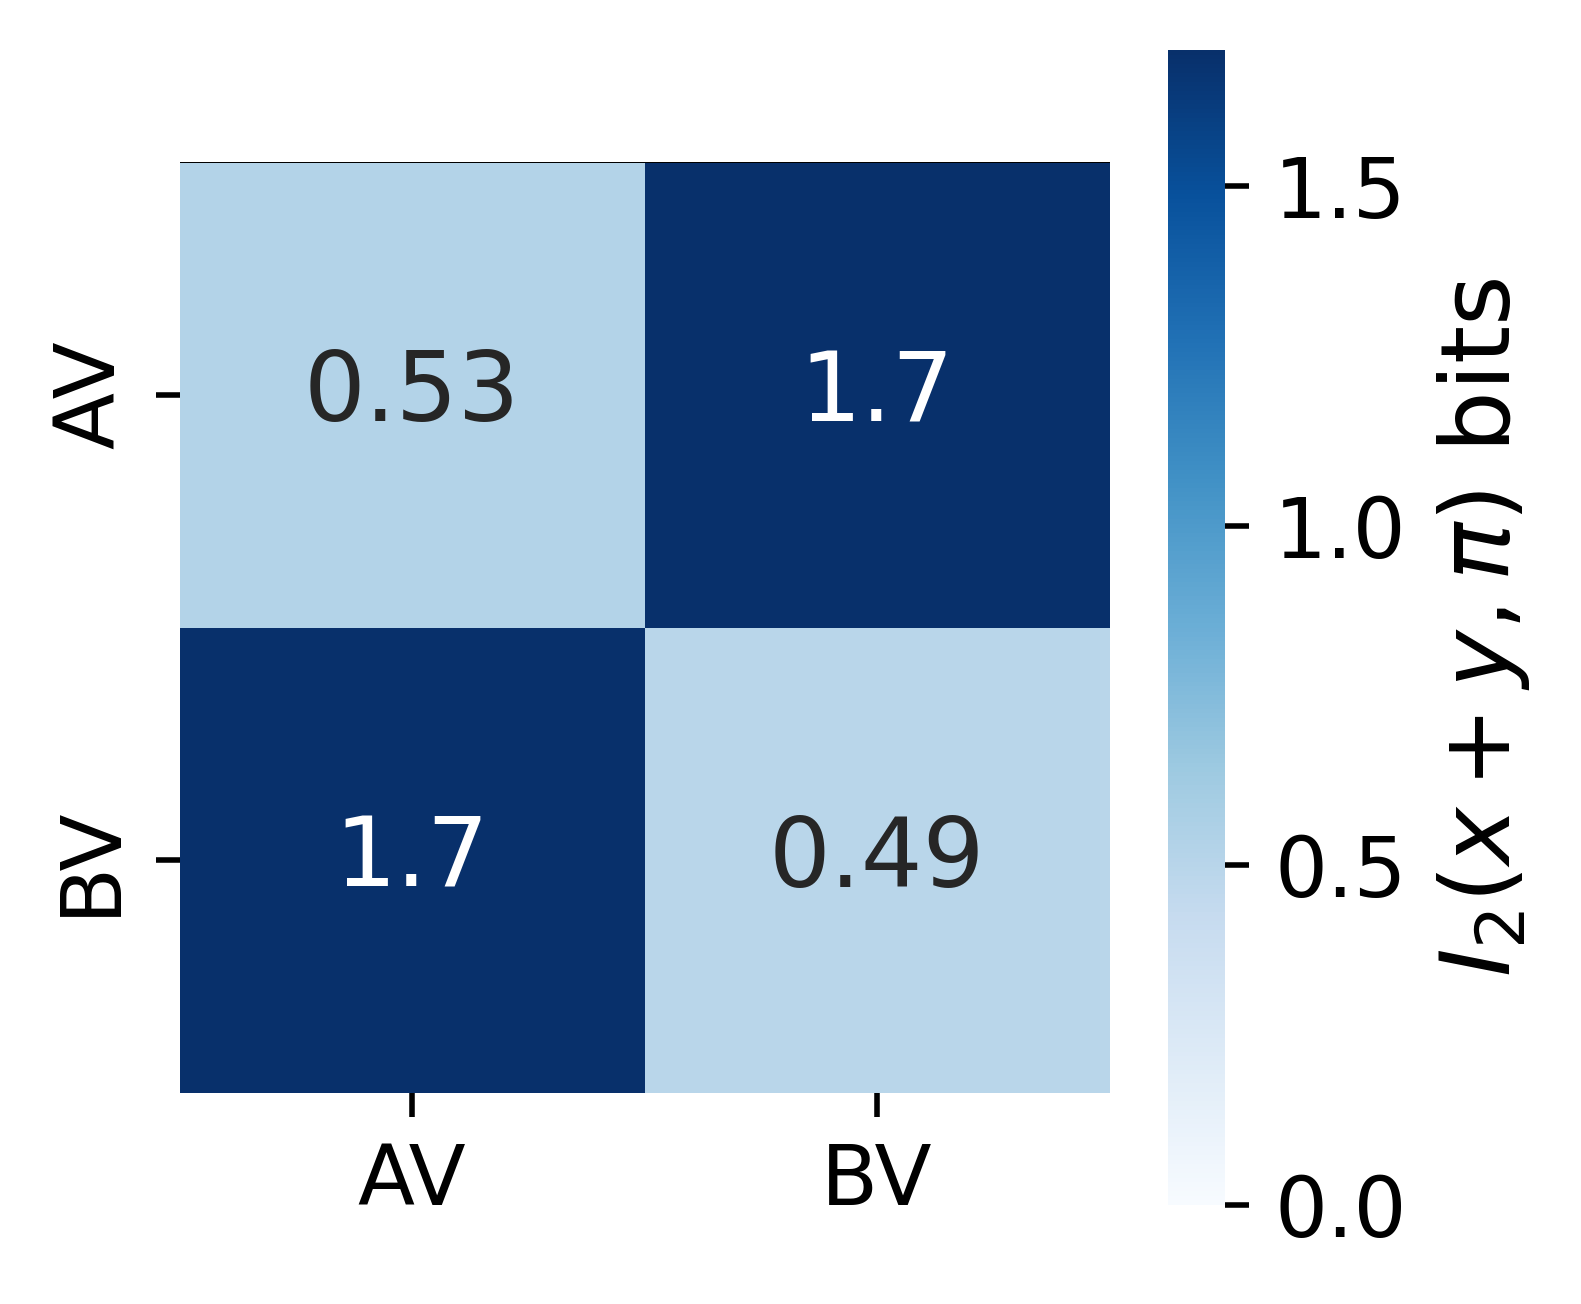

In [14]:
array = [
    [h_av_back-h_av_spc, h_avbv_back-h_avbv_spc],
    [h_avbv_back-h_avbv_spc,h_bv_back-h_bv_spc]
]

df_mi = pd.DataFrame(array, index=["AV", "BV"], columns=["AV", "BV"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x+y, \pi)$ bits'},vmin=0,annot=True,vmax=1.7)
ax.set_facecolor('xkcd:black')
plt.savefig('alphabetavRelevance.png',bbox_inches = 'tight');

In [15]:
h_avgivenbv_back = h_av_back
h_bvgivenav_back = h_bv_back

h_avgivenbv_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRBV"], ["TRAV"]))
h_bvgivenav_spc = -np.log2(pc_grouped(vdjdb, ["Epitope","TRAV"], ["TRBV"]))

/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))
/Users/james/miniconda3/lib/python3.10/site-packages/pyrepseq/stats.py:89: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum(counts*(counts-1))/(N*(N-1))


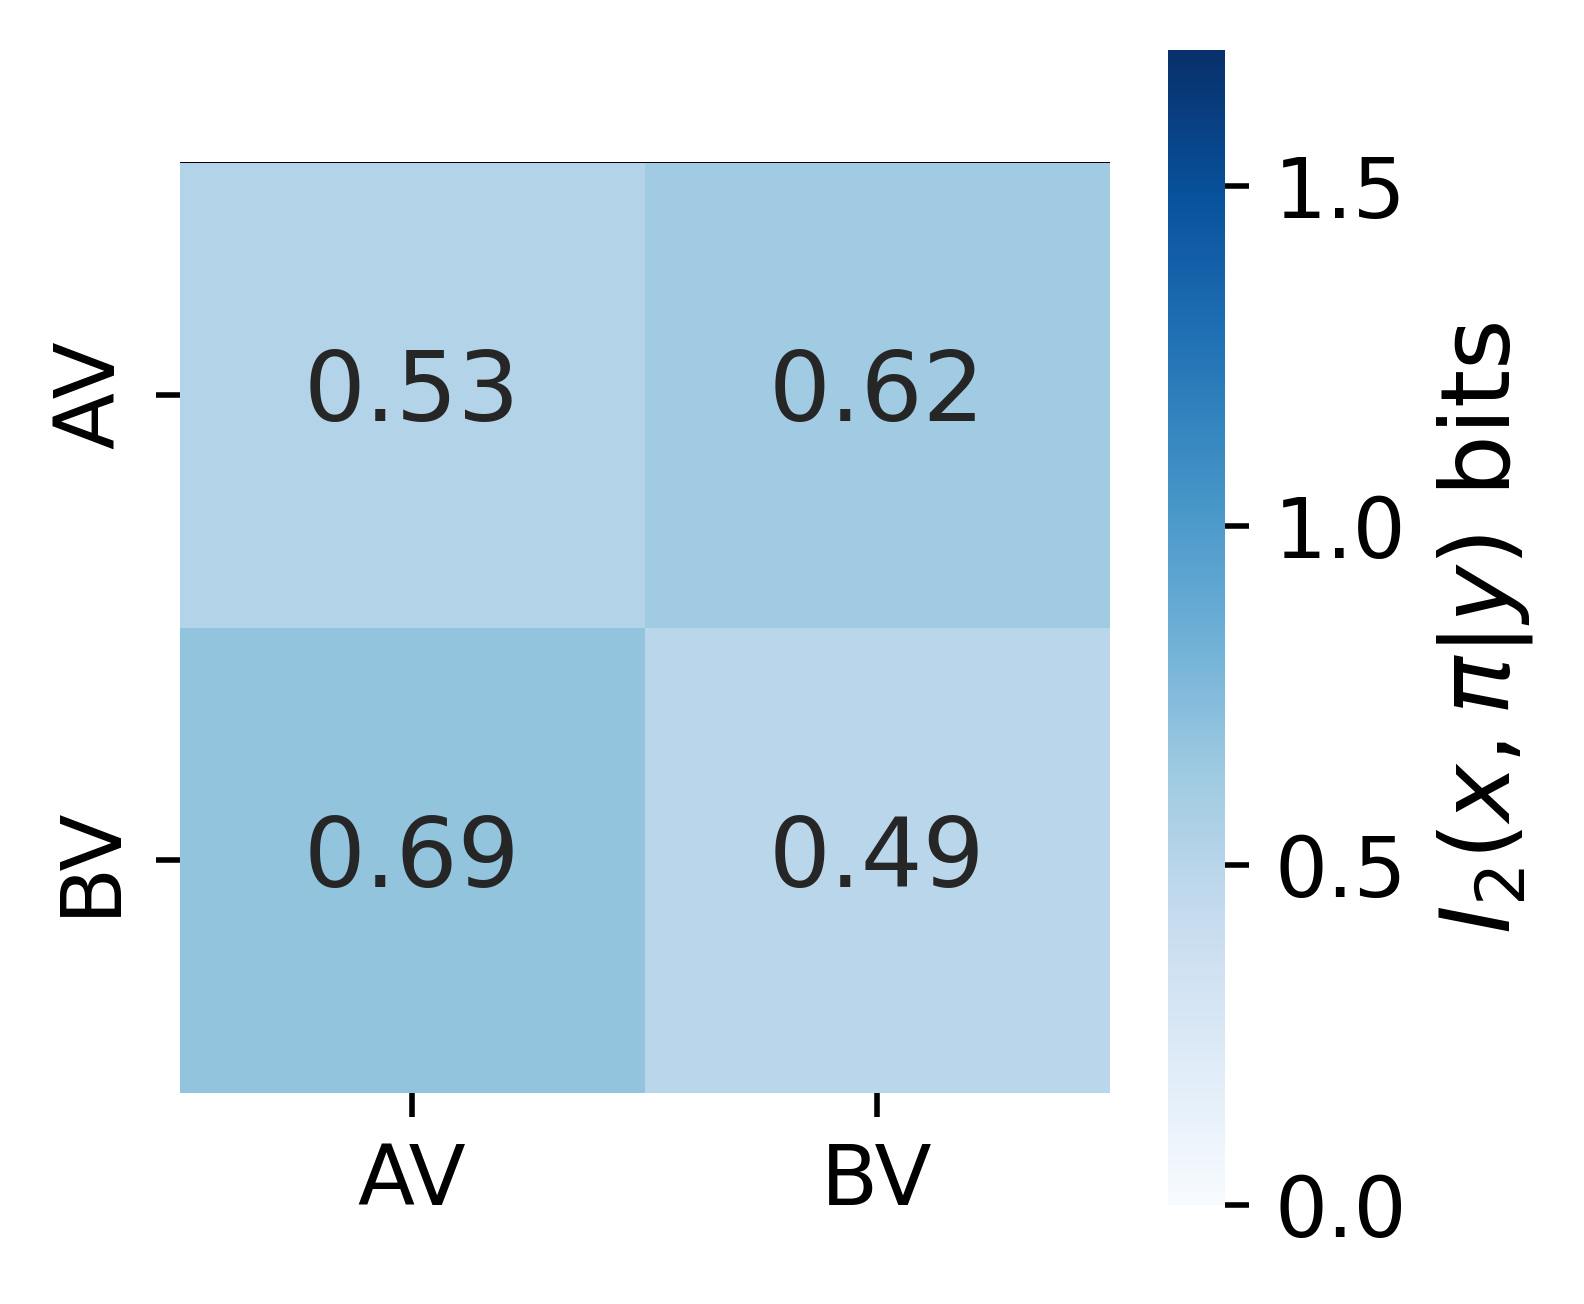

In [16]:
array = [
    [h_av_back-h_av_spc, h_bvgivenav_back-h_bvgivenav_spc],
    [h_avgivenbv_back-h_avgivenbv_spc,h_bv_back-h_bv_spc]
]

df_mi = pd.DataFrame(array, index=["AV", "BV"], columns=["AV", "BV"])

fig, ax = plt.subplots(figsize = (3,3), dpi = 500)
sns.heatmap(df_mi, square='true', cmap='Blues', ax=ax, cbar_kws={'label': '$I_2(x, \pi | y)$ bits'},annot=True,vmin=0,vmax=1.7)
ax.set_facecolor('xkcd:black')
plt.savefig('alphabetavRedundancy.png',bbox_inches = 'tight');